<a href="https://colab.research.google.com/github/FaridTavakkolinia/Customer-Personality-Analysis/blob/main/Customer_Personality_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import missingno as msno
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import AgglomerativeClustering
np.random.seed(42)

In [ ]:
df = pd.read_csv("marketing_campaign.csv", sep="\t")

In [ ]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [ ]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


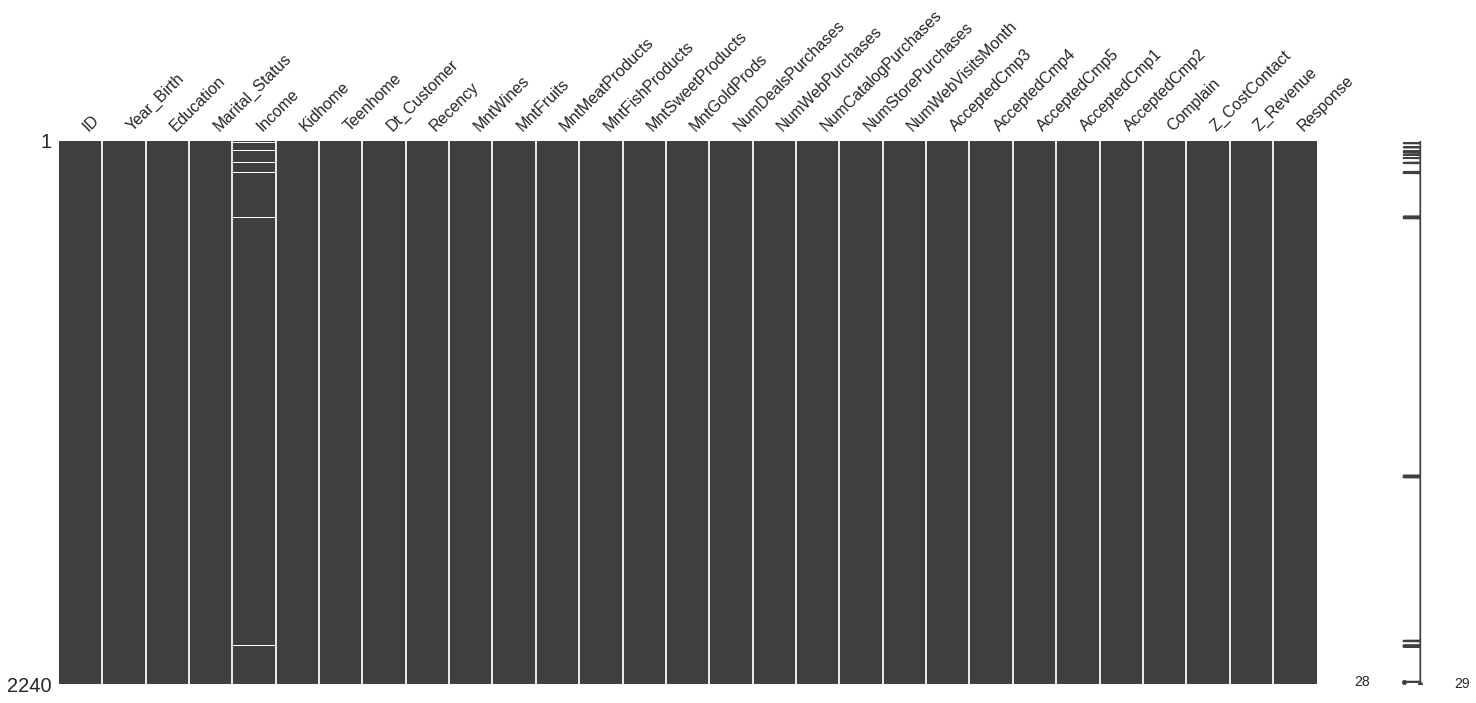

In [ ]:
msno.matrix(df)

In [ ]:
df = df.dropna()

In [ ]:
len(df)

2216

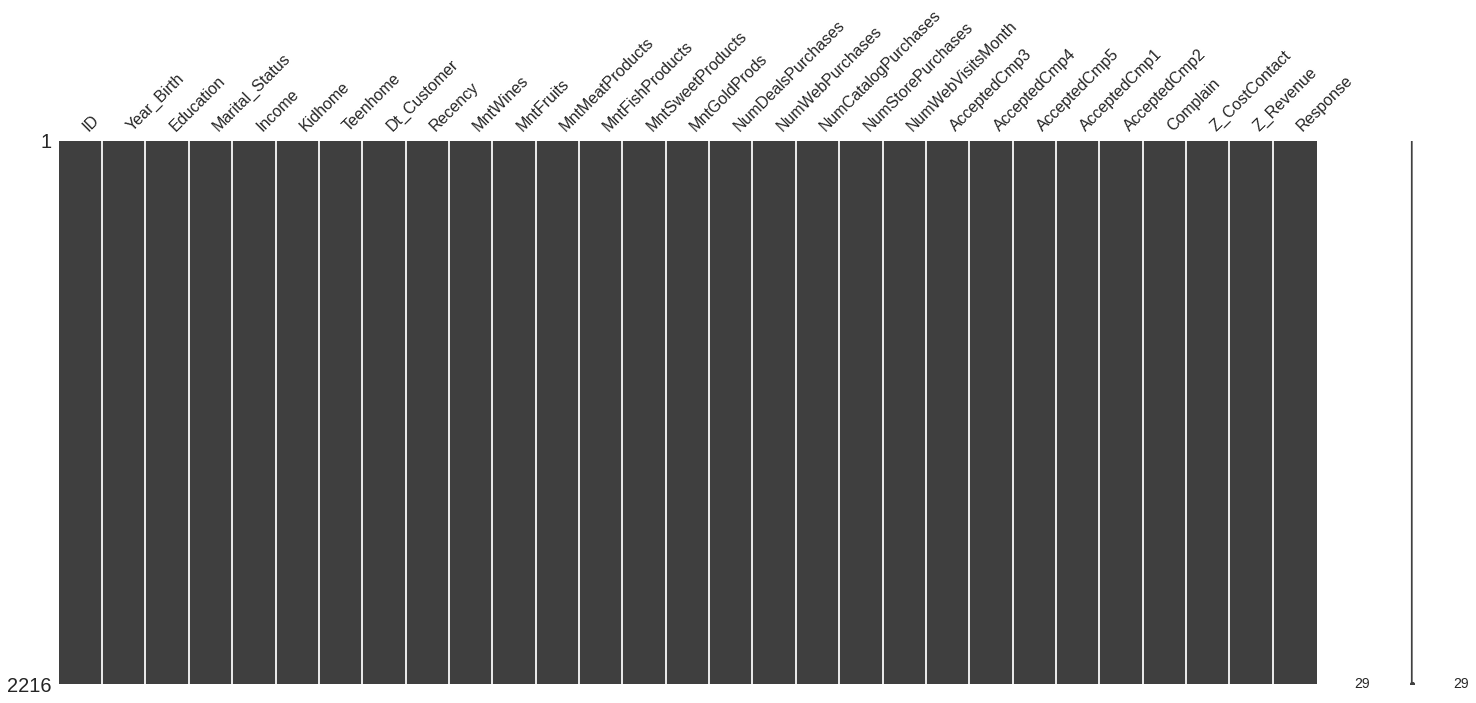

In [ ]:
msno.matrix(df)

In [ ]:
df['Dt_Customer'] = df['Dt_Customer'].astype('datetime64[ns]')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2216 non-null   int64         
 1   Year_Birth           2216 non-null   int64         
 2   Education            2216 non-null   object        
 3   Marital_Status       2216 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2216 non-null   int64         
 6   Teenhome             2216 non-null   int64         
 7   Dt_Customer          2216 non-null   datetime64[ns]
 8   Recency              2216 non-null   int64         
 9   MntWines             2216 non-null   int64         
 10  MntFruits            2216 non-null   int64         
 11  MntMeatProducts      2216 non-null   int64         
 12  MntFishProducts      2216 non-null   int64         
 13  MntSweetProducts     2216 non-nul

In [ ]:
# unique values present in each column
df.nunique()

ID                     2216
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1974
Kidhome                   3
Teenhome                  3
Dt_Customer             662
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         554
MntFishProducts         182
MntSweetProducts        176
MntGoldProds            212
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
Response                  2
dtype: int64

In [ ]:
print("time of inserting first Customer in database",df["Dt_Customer"].min())
print("time of inserting last customer in database", df["Dt_Customer"].max())

time of inserting first Customer in database 2012-01-08 00:00:00
time of inserting last customer in database 2014-12-06 00:00:00


In [ ]:
Membership_Period = []
for i in df["Dt_Customer"]:
    j = df["Dt_Customer"].max() - i
    Membership_Period.append(j)
    

In [ ]:
df['Membership_Period'] = Membership_Period

In [ ]:
df['Membership_Period'] = pd.to_numeric(df['Membership_Period'].dt.days, downcast='integer')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2216 non-null   int64         
 1   Year_Birth           2216 non-null   int64         
 2   Education            2216 non-null   object        
 3   Marital_Status       2216 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2216 non-null   int64         
 6   Teenhome             2216 non-null   int64         
 7   Dt_Customer          2216 non-null   datetime64[ns]
 8   Recency              2216 non-null   int64         
 9   MntWines             2216 non-null   int64         
 10  MntFruits            2216 non-null   int64         
 11  MntMeatProducts      2216 non-null   int64         
 12  MntFishProducts      2216 non-null   int64         
 13  MntSweetProducts     2216 non-nul

In [ ]:
df["Marital_Status"].value_counts()

Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

In [ ]:
df['Marital_Status'] = df['Marital_Status'].replace(['Married','Together'],'Couple')
df['Marital_Status'] = df['Marital_Status'].replace(['Single','Divorced','Widow','Alone','Absurd','YOLO'],'Single')


In [ ]:
df["Marital_Status"].value_counts()

Couple    1430
Single     786
Name: Marital_Status, dtype: int64

In [ ]:
df["Education"].value_counts()

Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: Education, dtype: int64

In [ ]:
df['Education'] = df['Education'].replace(['PhD','Master'],'Postgraduate')
df['Education'] = df['Education'].replace(['Graduation'],'Graduate')
df['Education'] = df['Education'].replace(['2n Cycle','Basic'],'UnderGraduate')

In [ ]:
df["Education"].value_counts()

Graduate         1116
Postgraduate      846
UnderGraduate     254
Name: Education, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2216 non-null   int64         
 1   Year_Birth           2216 non-null   int64         
 2   Education            2216 non-null   object        
 3   Marital_Status       2216 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2216 non-null   int64         
 6   Teenhome             2216 non-null   int64         
 7   Dt_Customer          2216 non-null   datetime64[ns]
 8   Recency              2216 non-null   int64         
 9   MntWines             2216 non-null   int64         
 10  MntFruits            2216 non-null   int64         
 11  MntMeatProducts      2216 non-null   int64         
 12  MntFishProducts      2216 non-null   int64         
 13  MntSweetProducts     2216 non-nul

In [ ]:
column_names = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts','MntSweetProducts','MntGoldProds']
df['Total_Spent']= df[column_names].sum(axis=1)

In [ ]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Membership_Period,Total_Spent
0,5524,1957,Graduate,Single,58138.0,0,0,2012-04-09,58,635,...,0,0,0,0,0,3,11,1,971,1617
1,2174,1954,Graduate,Single,46344.0,1,1,2014-08-03,38,11,...,0,0,0,0,0,3,11,0,125,27
2,4141,1965,Graduate,Couple,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,0,3,11,0,472,776
3,6182,1984,Graduate,Couple,26646.0,1,0,2014-10-02,26,11,...,0,0,0,0,0,3,11,0,65,53
4,5324,1981,Postgraduate,Couple,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,0,3,11,0,321,422


In [ ]:
column_names_2 = ['Kidhome', 'Teenhome']
df['Total_children'] = df[column_names_2].sum(axis=1)

In [ ]:
column_names_3 = ['AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','AcceptedCmp1','AcceptedCmp2']
df['Total_Cmp'] = df[column_names_3].sum(axis=1)

In [ ]:
column_names_4 = ['NumDealsPurchases', 'NumWebPurchases','NumCatalogPurchases', 'NumStorePurchases']
df['Total_Purchases'] = df[column_names_4].sum(axis=1)

In [ ]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Membership_Period,Total_Spent,Total_children,Total_Cmp,Total_Purchases
0,5524,1957,Graduate,Single,58138.0,0,0,2012-04-09,58,635,...,0,0,3,11,1,971,1617,0,0,25
1,2174,1954,Graduate,Single,46344.0,1,1,2014-08-03,38,11,...,0,0,3,11,0,125,27,2,0,6
2,4141,1965,Graduate,Couple,71613.0,0,0,2013-08-21,26,426,...,0,0,3,11,0,472,776,0,0,21
3,6182,1984,Graduate,Couple,26646.0,1,0,2014-10-02,26,11,...,0,0,3,11,0,65,53,1,0,8
4,5324,1981,Postgraduate,Couple,58293.0,1,0,2014-01-19,94,173,...,0,0,3,11,0,321,422,1,0,19


In [ ]:
family_size = []
for i in df['Marital_Status']:
    if i == 'Single':
        family_size.append(1)
    else:
        family_size.append(2)
df['Family_Size'] = family_size + df['Total_children']

In [ ]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Complain,Z_CostContact,Z_Revenue,Response,Membership_Period,Total_Spent,Total_children,Total_Cmp,Total_Purchases,Family_Size
0,5524,1957,Graduate,Single,58138.0,0,0,2012-04-09,58,635,...,0,3,11,1,971,1617,0,0,25,1
1,2174,1954,Graduate,Single,46344.0,1,1,2014-08-03,38,11,...,0,3,11,0,125,27,2,0,6,3
2,4141,1965,Graduate,Couple,71613.0,0,0,2013-08-21,26,426,...,0,3,11,0,472,776,0,0,21,2
3,6182,1984,Graduate,Couple,26646.0,1,0,2014-10-02,26,11,...,0,3,11,0,65,53,1,0,8,3
4,5324,1981,Postgraduate,Couple,58293.0,1,0,2014-01-19,94,173,...,0,3,11,0,321,422,1,0,19,3


In [ ]:
df["Age"] = 2022-df["Year_Birth"]

In [ ]:
fig = px.histogram(df, x="Age",color="Marital_Status")
fig.show()

In [ ]:
drop = [ "Dt_Customer", "Z_CostContact", "Z_Revenue", "Year_Birth", "ID"]
df = df.drop(drop, axis=1)

In [ ]:
df.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp2,Complain,Response,Membership_Period,Total_Spent,Total_children,Total_Cmp,Total_Purchases,Family_Size,Age
0,Graduate,Single,58138.0,0,0,58,635,88,546,172,...,0,0,1,971,1617,0,0,25,1,65
1,Graduate,Single,46344.0,1,1,38,11,1,6,2,...,0,0,0,125,27,2,0,6,3,68
2,Graduate,Couple,71613.0,0,0,26,426,49,127,111,...,0,0,0,472,776,0,0,21,2,57
3,Graduate,Couple,26646.0,1,0,26,11,4,20,10,...,0,0,0,65,53,1,0,8,3,38
4,Postgraduate,Couple,58293.0,1,0,94,173,43,118,46,...,0,0,0,321,422,1,0,19,3,41


In [ ]:
df["Family"] = np.where(df.Total_children> 0, 1, 0)

In [ ]:
df.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,Complain,Response,Membership_Period,Total_Spent,Total_children,Total_Cmp,Total_Purchases,Family_Size,Age,Family
0,Graduate,Single,58138.0,0,0,58,635,88,546,172,...,0,1,971,1617,0,0,25,1,65,0
1,Graduate,Single,46344.0,1,1,38,11,1,6,2,...,0,0,125,27,2,0,6,3,68,1
2,Graduate,Couple,71613.0,0,0,26,426,49,127,111,...,0,0,472,776,0,0,21,2,57,0
3,Graduate,Couple,26646.0,1,0,26,11,4,20,10,...,0,0,65,53,1,0,8,3,38,1
4,Postgraduate,Couple,58293.0,1,0,94,173,43,118,46,...,0,0,321,422,1,0,19,3,41,1


In [ ]:
To_Plot = [ "Income", "Recency", "Education", "Age", "Total_Spent", "Family_Size","Membership_Period","Family"]


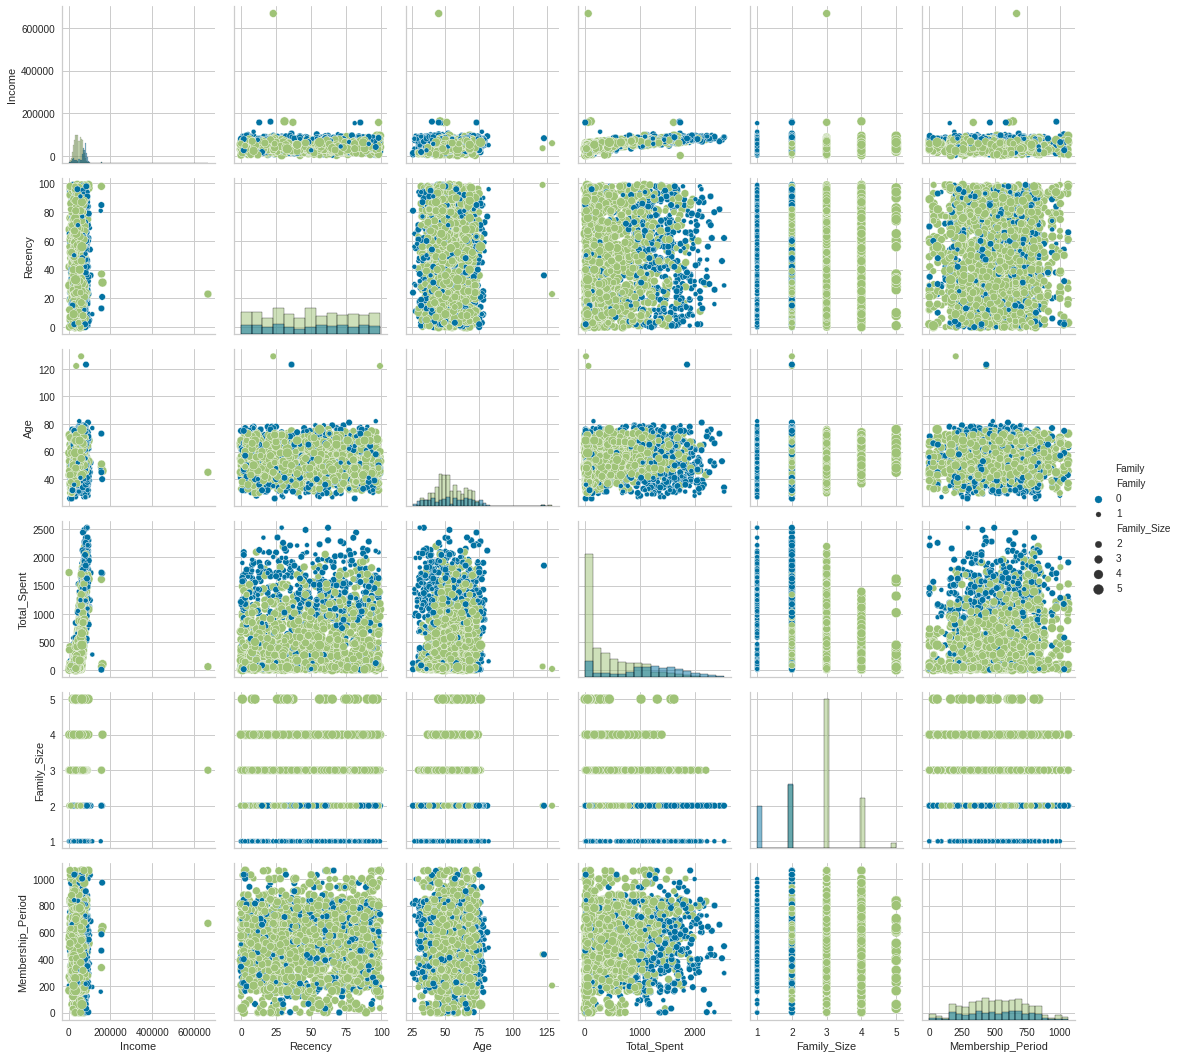

In [ ]:
g = sns.PairGrid(df[To_Plot], hue="Family")
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot, size=df["Family_Size"])
g.add_legend()

In [ ]:
#fig = px.scatter_matrix(df,
#    dimensions=df[To_Plot],
#    color="Family", symbol="Family",
#    title="Scatter matrix of customers data set")
#fig.update_traces(diagonal_visible=False)
#fig.update_layout(
#     width=2500,
#    height=2500,
#)

#fig.show()

In [ ]:
#Dropping the outliers by setting a cap on Age and income. 
df = df[(df["Age"]<90)]
df = df[(df["Income"]<600000)]

In [ ]:
fig = px.scatter(df, x="Income", y="Total_Spent",
	         size="Family_Size", color="Education")
fig.show()

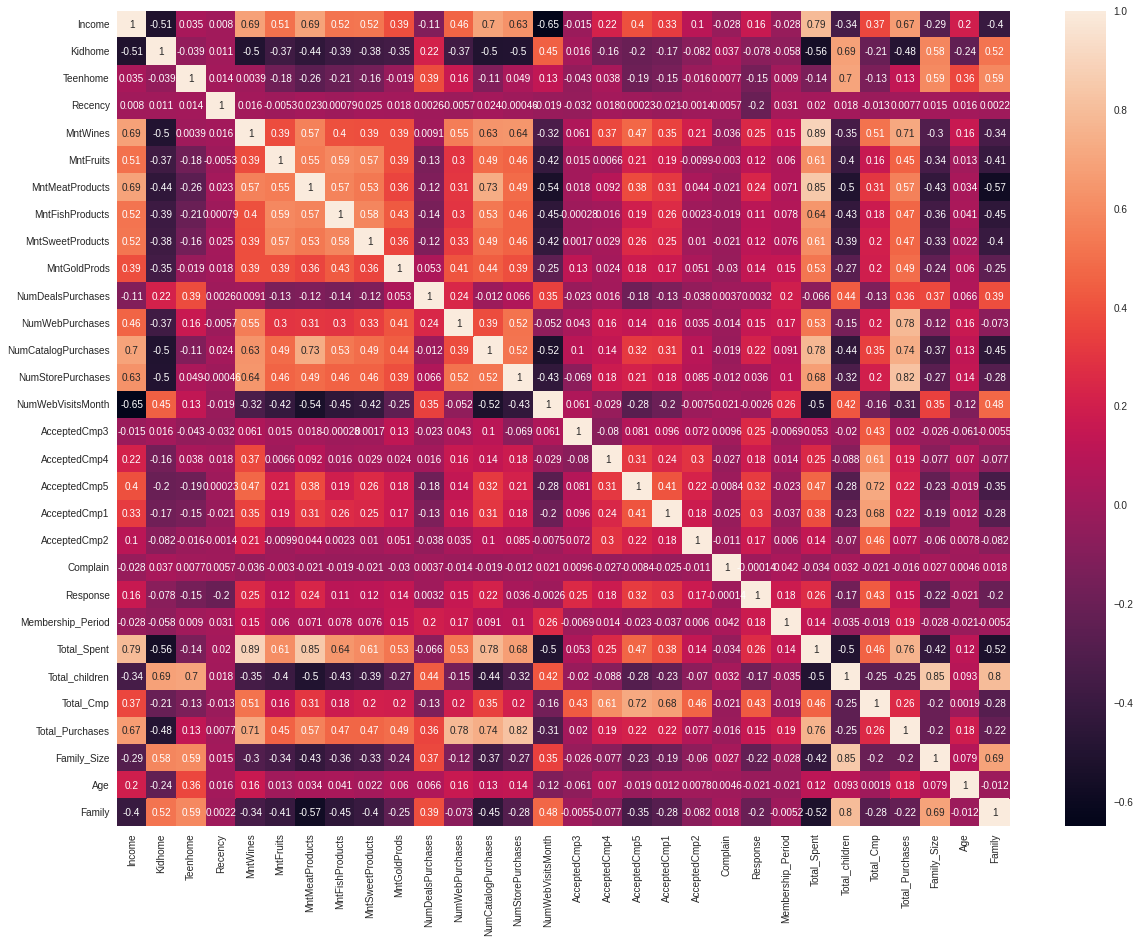

In [ ]:
#correlation matrix
corrmat= df.corr()
plt.figure(figsize=(20,15))  
sns.heatmap(corrmat,annot=True)

DATA PREPROCESSING

In [ ]:
#Get list of categorical variables

c = df.select_dtypes(include='object').columns
c

Index(['Education', 'Marital_Status'], dtype='object')

In [ ]:
labelencoder = LabelEncoder()
df['Education'] = labelencoder.fit_transform(df['Education'])
df['Marital_Status'] = labelencoder.fit_transform(df['Marital_Status'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2212 entries, 0 to 2239
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2212 non-null   int64  
 1   Marital_Status       2212 non-null   int64  
 2   Income               2212 non-null   float64
 3   Kidhome              2212 non-null   int64  
 4   Teenhome             2212 non-null   int64  
 5   Recency              2212 non-null   int64  
 6   MntWines             2212 non-null   int64  
 7   MntFruits            2212 non-null   int64  
 8   MntMeatProducts      2212 non-null   int64  
 9   MntFishProducts      2212 non-null   int64  
 10  MntSweetProducts     2212 non-null   int64  
 11  MntGoldProds         2212 non-null   int64  
 12  NumDealsPurchases    2212 non-null   int64  
 13  NumWebPurchases      2212 non-null   int64  
 14  NumCatalogPurchases  2212 non-null   int64  
 15  NumStorePurchases    2212 non-null   i

In [ ]:
df.head(15)

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,Complain,Response,Membership_Period,Total_Spent,Total_children,Total_Cmp,Total_Purchases,Family_Size,Age,Family
0,0,1,58138.0,0,0,58,635,88,546,172,...,0,1,971,1617,0,0,25,1,65,0
1,0,1,46344.0,1,1,38,11,1,6,2,...,0,0,125,27,2,0,6,3,68,1
2,0,0,71613.0,0,0,26,426,49,127,111,...,0,0,472,776,0,0,21,2,57,0
3,0,0,26646.0,1,0,26,11,4,20,10,...,0,0,65,53,1,0,8,3,38,1
4,1,0,58293.0,1,0,94,173,43,118,46,...,0,0,321,422,1,0,19,3,41,1
5,1,0,62513.0,0,1,16,520,42,98,0,...,0,0,453,716,1,0,22,3,55,1
6,0,1,55635.0,0,1,34,235,65,164,50,...,0,0,753,590,1,0,21,2,51,1
7,1,0,33454.0,1,0,32,76,10,56,3,...,0,0,488,169,1,0,10,3,37,1
8,1,0,30351.0,1,0,19,14,0,24,3,...,0,1,548,46,1,0,6,3,48,1
9,1,0,5648.0,1,1,68,28,0,6,1,...,0,0,268,49,2,1,2,4,72,1


In [ ]:
df_2 = df.drop(columns=['Kidhome', 'Teenhome','AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain','NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases'])


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2212 entries, 0 to 2239
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2212 non-null   int64  
 1   Marital_Status       2212 non-null   int64  
 2   Income               2212 non-null   float64
 3   Kidhome              2212 non-null   int64  
 4   Teenhome             2212 non-null   int64  
 5   Recency              2212 non-null   int64  
 6   MntWines             2212 non-null   int64  
 7   MntFruits            2212 non-null   int64  
 8   MntMeatProducts      2212 non-null   int64  
 9   MntFishProducts      2212 non-null   int64  
 10  MntSweetProducts     2212 non-null   int64  
 11  MntGoldProds         2212 non-null   int64  
 12  NumDealsPurchases    2212 non-null   int64  
 13  NumWebPurchases      2212 non-null   int64  
 14  NumCatalogPurchases  2212 non-null   int64  
 15  NumStorePurchases    2212 non-null   i

In [ ]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2212 entries, 0 to 2239
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Education          2212 non-null   int64  
 1   Marital_Status     2212 non-null   int64  
 2   Income             2212 non-null   float64
 3   Recency            2212 non-null   int64  
 4   MntWines           2212 non-null   int64  
 5   MntFruits          2212 non-null   int64  
 6   MntMeatProducts    2212 non-null   int64  
 7   MntFishProducts    2212 non-null   int64  
 8   MntSweetProducts   2212 non-null   int64  
 9   MntGoldProds       2212 non-null   int64  
 10  NumWebVisitsMonth  2212 non-null   int64  
 11  Response           2212 non-null   int64  
 12  Membership_Period  2212 non-null   int16  
 13  Total_Spent        2212 non-null   int64  
 14  Total_children     2212 non-null   int64  
 15  Total_Cmp          2212 non-null   int64  
 16  Total_Purchases    2212 

In [ ]:
df_2.columns

Index(['Education', 'Marital_Status', 'Income', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumWebVisitsMonth', 'Response', 'Membership_Period',
       'Total_Spent', 'Total_children', 'Total_Cmp', 'Total_Purchases',
       'Family_Size', 'Age', 'Family'],
      dtype='object')

In [ ]:
scaler = StandardScaler()
scaler.fit(df_2)
df_2_scaled = pd.DataFrame(scaler.transform(df_2),columns= df_2.columns )

In [ ]:
df_2_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2212 entries, 0 to 2211
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Education          2212 non-null   float64
 1   Marital_Status     2212 non-null   float64
 2   Income             2212 non-null   float64
 3   Recency            2212 non-null   float64
 4   MntWines           2212 non-null   float64
 5   MntFruits          2212 non-null   float64
 6   MntMeatProducts    2212 non-null   float64
 7   MntFishProducts    2212 non-null   float64
 8   MntSweetProducts   2212 non-null   float64
 9   MntGoldProds       2212 non-null   float64
 10  NumWebVisitsMonth  2212 non-null   float64
 11  Response           2212 non-null   float64
 12  Membership_Period  2212 non-null   float64
 13  Total_Spent        2212 non-null   float64
 14  Total_children     2212 non-null   float64
 15  Total_Cmp          2212 non-null   float64
 16  Total_Purchases    2212 

In [ ]:
df_2_scaled.head()

,Education,Marital_Status,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumWebVisitsMonth,Response,Membership_Period,Total_Spent,Total_children,Total_Cmp,Total_Purchases,Family_Size,Age,Family
0,-0.893586,1.349603,0.287105,0.310353,0.977660,1.552041,1.690293,2.453472,1.483713,0.852576,0.692181,2.375425,1.973583,1.676245,-1.264598,-0.43916,1.317945,-1.758359,1.018352,-1.581139
1,-0.893586,1.349603,-0.260882,-0.380813,-0.872618,-0.637461,-0.718230,-0.651004,-0.634019,-0.733642,-0.132545,-0.420977,-1.665144,-0.963297,1.404572,-0.43916,-1.159273,0.449070,1.274785,0.632456
2,-0.893586,-0.740959,0.913196,-0.795514,0.357935,0.570540,-0.178542,1.339513,-0.147184,-0.037254,-0.544908,-0.420977,-0.172664,0.280110,-1.264598,-0.43916,0.796425,-0.654644,0.334530,-1.581139
3,-0.893586,-0.740959,-1.176114,-0.795514,-0.872618,-0.561961,-0.655787,-0.504911,-0.585335,-0.752987,0.279818,-0.420977,-1.923210,-0.920135,0.069987,-0.43916,-0.898513,0.449070,-1.289547,0.632456
4,0.571657,-0.740959,0.294307,1.554453,-0.392257,0.419540,-0.218684,0.152508,-0.001133,-0.559545,-0.132545,-0.420977,-0.822130,-0.307562,0.069987,-0.43916,0.535666,0.449070,-1.033114,0.632456


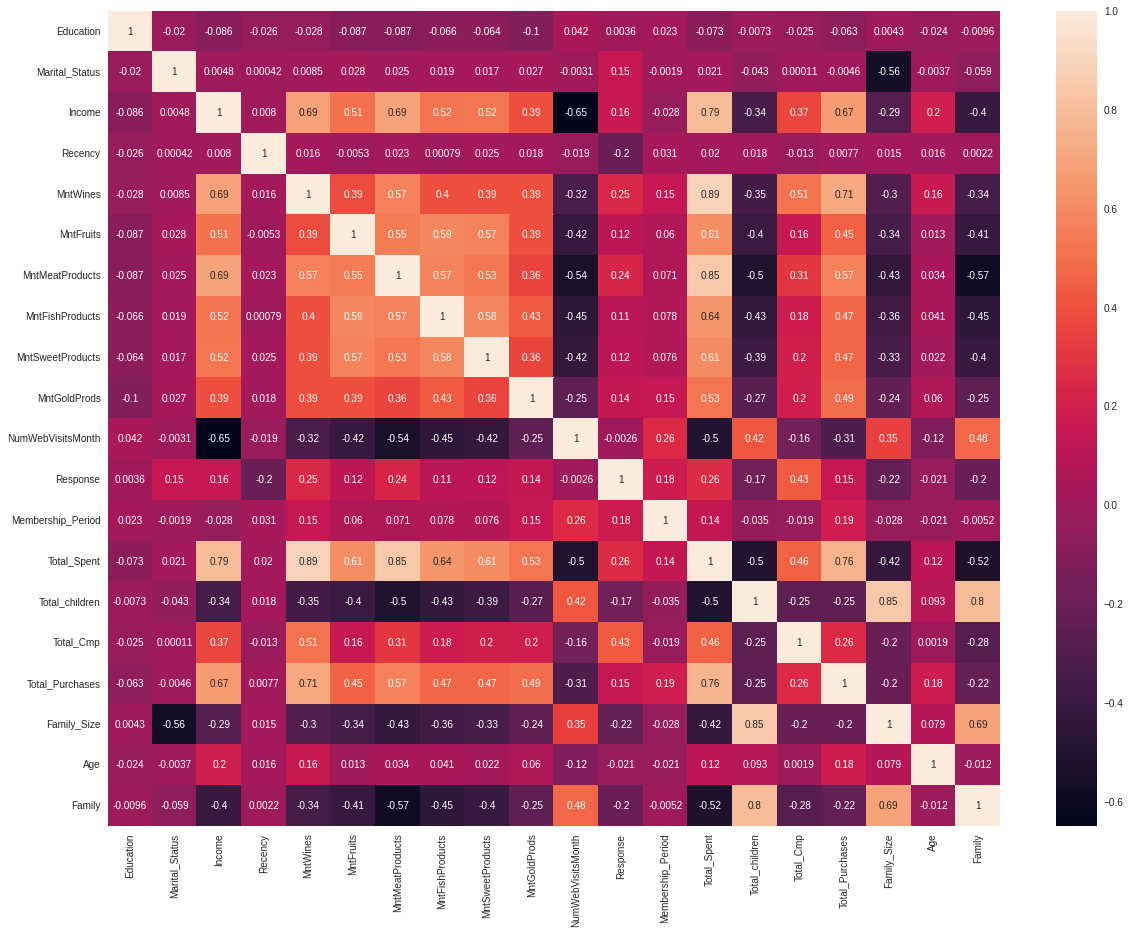

In [ ]:
corrmat= df_2_scaled.corr()
plt.figure(figsize=(20,15))  
sns.heatmap(corrmat,annot=True)

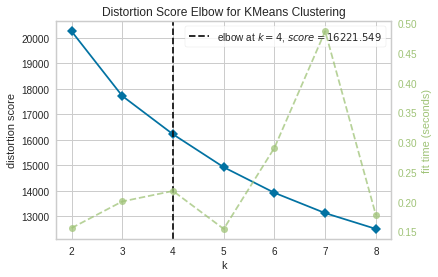

In [ ]:
to_keep = ['Education', 'Marital_Status', 'Income','Response', 'Membership_Period', 'Total_Spent', 'Total_children',
       'Total_Cmp', 'Total_Purchases', 'Family_Size', 'Age', 'Family']

elbow = KElbowVisualizer(KMeans(), k=8, random_state=42)
elbow.fit(df_2_scaled[to_keep])
elbow.show()
plt.show()

In [ ]:
kmeancluster = KMeans(n_clusters=4,random_state=42)
df_2_scaled["kcluster"] = kmeancluster.fit_predict(df_2_scaled[to_keep])

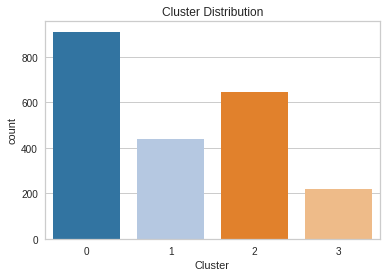

In [ ]:
sns.countplot(data=df_2_scaled, x="kcluster", palette="tab20")
plt.title("Cluster Distribution")
plt.xlabel("Cluster")
plt.show()

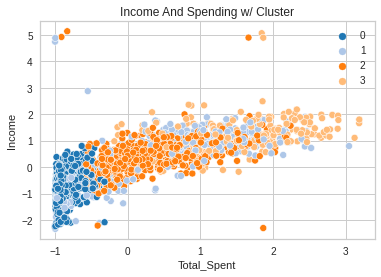

In [ ]:
pl = sns.scatterplot(data = df_2_scaled,x=df_2_scaled["Total_Spent"], y=df_2_scaled["Income"],hue=df_2_scaled["kcluster"], palette="tab20")
pl.set_title("Income And Spending w/ Cluster")
plt.legend()
plt.show()

In [ ]:
print(df_2_scaled.shape)

(2212, 21)


In [ ]:
labels = ['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3']

cluster0_val = df_2_scaled[df_2_scaled["kcluster"]==0].shape[0]
cluster1_val = df_2_scaled[df_2_scaled["kcluster"]==1].shape[0]
cluster2_val = df_2_scaled[df_2_scaled["kcluster"]==2].shape[0]
cluster3_val = df_2_scaled[df_2_scaled["kcluster"]==3].shape[0]
values = [cluster0_val, cluster1_val, cluster2_val, cluster3_val]

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole = 0.5, title="kcluster")])
fig.show()

In [ ]:
df_2_scaled.head()

,Education,Marital_Status,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,Response,Membership_Period,Total_Spent,Total_children,Total_Cmp,Total_Purchases,Family_Size,Age,Family,kcluster
0,-0.893586,1.349603,0.287105,0.310353,0.977660,1.552041,1.690293,2.453472,1.483713,0.852576,...,2.375425,1.973583,1.676245,-1.264598,-0.43916,1.317945,-1.758359,1.018352,-1.581139,3
1,-0.893586,1.349603,-0.260882,-0.380813,-0.872618,-0.637461,-0.718230,-0.651004,-0.634019,-0.733642,...,-0.420977,-1.665144,-0.963297,1.404572,-0.43916,-1.159273,0.449070,1.274785,0.632456,0
2,-0.893586,-0.740959,0.913196,-0.795514,0.357935,0.570540,-0.178542,1.339513,-0.147184,-0.037254,...,-0.420977,-0.172664,0.280110,-1.264598,-0.43916,0.796425,-0.654644,0.334530,-1.581139,1
3,-0.893586,-0.740959,-1.176114,-0.795514,-0.872618,-0.561961,-0.655787,-0.504911,-0.585335,-0.752987,...,-0.420977,-1.923210,-0.920135,0.069987,-0.43916,-0.898513,0.449070,-1.289547,0.632456,0
4,0.571657,-0.740959,0.294307,1.554453,-0.392257,0.419540,-0.218684,0.152508,-0.001133,-0.559545,...,-0.420977,-0.822130,-0.307562,0.069987,-0.43916,0.535666,0.449070,-1.033114,0.632456,2


In [ ]:
fig = px.scatter_3d(df_2_scaled, x = df_2_scaled['Age'], y = df_2_scaled['Income'], z=df_2_scaled["Total_Purchases"],
              color='kcluster')
fig.show()